<a href="https://colab.research.google.com/github/tanvithakur22/Flipkart_review/blob/main/Flipkart_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib as jb

In [ ]:
flipkart_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/NLP/Flipkart Review.csv')

In [ ]:
flipkart_data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [ ]:
flipkart_data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [ ]:
flipkart_data.dropna(inplace=True)

In [ ]:
flipkart_data.reset_index(drop=True,inplace=True)

In [ ]:
flipkart_data.drop(['product_name','product_price'],axis=1,inplace=True)

In [ ]:
flipkart_data.head()

,Rate,Review,Summary,Sentiment
0,5,super!,great cooler excellent air flow and for this p...,positive
1,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3,fair,the quality is good but the power of air is de...,positive
3,1,useless product,very bad product its a only a fan,negative
4,3,fair,ok ok product,neutral


<Axes: xlabel='Sentiment', ylabel='count'>

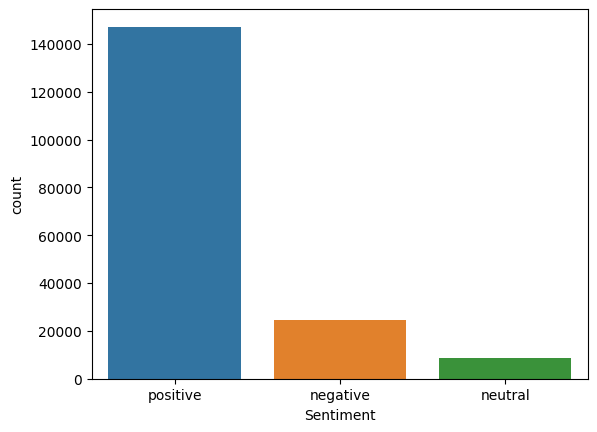

In [ ]:
sns.countplot(flipkart_data,x='Sentiment')

In [ ]:
def remove_space(review):
  temp_list = []
  review = ''.join(review.split())
  temp_list.append(review)
  return temp_list

In [ ]:
flipkart_data['Review'] = flipkart_data['Review'].apply(remove_space)

In [ ]:
flipkart_data['Rate'] = flipkart_data['Rate'].apply(lambda rate:list(rate))

In [ ]:
flipkart_data['Summary'] = flipkart_data['Summary'].apply(lambda summary:summary.split())

In [ ]:
flipkart_data.head()

,Rate,Review,Summary,Sentiment
0,[5],[super!],"[great, cooler, excellent, air, flow, and, for...",positive
1,[5],[awesome],"[best, budget, 2, fit, cooler, nice, cooling]",positive
2,[3],[fair],"[the, quality, is, good, but, the, power, of, ...",positive
3,[1],[uselessproduct],"[very, bad, product, its, a, only, a, fan]",negative
4,[3],[fair],"[ok, ok, product]",neutral


In [ ]:
flipkart_data['Tags'] = flipkart_data['Rate'] + flipkart_data['Review'] + flipkart_data['Summary']

In [ ]:
flipkart_data.head()

,Rate,Review,Summary,Sentiment,Tags
0,[5],[super!],"[great, cooler, excellent, air, flow, and, for...",positive,"[5, super!, great, cooler, excellent, air, flo..."
1,[5],[awesome],"[best, budget, 2, fit, cooler, nice, cooling]",positive,"[5, awesome, best, budget, 2, fit, cooler, nic..."
2,[3],[fair],"[the, quality, is, good, but, the, power, of, ...",positive,"[3, fair, the, quality, is, good, but, the, po..."
3,[1],[uselessproduct],"[very, bad, product, its, a, only, a, fan]",negative,"[1, uselessproduct, very, bad, product, its, a..."
4,[3],[fair],"[ok, ok, product]",neutral,"[3, fair, ok, ok, product]"


In [ ]:
flipkart_tags = flipkart_data[['Tags','Sentiment']]

In [ ]:
flipkart_tags.head()

,Tags,Sentiment
0,"[5, super!, great, cooler, excellent, air, flo...",positive
1,"[5, awesome, best, budget, 2, fit, cooler, nic...",positive
2,"[3, fair, the, quality, is, good, but, the, po...",positive
3,"[1, uselessproduct, very, bad, product, its, a...",negative
4,"[3, fair, ok, ok, product]",neutral


In [ ]:
from nltk.stem.porter import PorterStemmer

harry_potter = PorterStemmer()

In [ ]:
def stemming_words(items):
  temp_lst = []
  for word in items:
    temp_lst.append(harry_potter.stem(word))
  temp_lst = list(set(temp_lst))
  return temp_lst

In [ ]:
flipkart_tags['Tags'] = flipkart_tags['Tags'].apply(stemming_words)

<ipython-input-22-65f59c332c96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_tags['Tags'] = flipkart_tags['Tags'].apply(stemming_words)


In [ ]:
flipkart_tags['Tags'] = flipkart_tags['Tags'].apply(lambda tag:' '.join(tag))

<ipython-input-23-d8a3cae196f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_tags['Tags'] = flipkart_tags['Tags'].apply(lambda tag:' '.join(tag))


In [ ]:
flipkart_tags.head()

,Tags,Sentiment
0,and so great for air unbelievablejust 5 love c...,positive
1,best budget cool 5 cooler nice awesom fit 2,positive
2,is air power decent but the 3 qualiti of fair ...,positive
3,it bad veri product a uselessproduct fan 1 onli,negative
4,fair 3 ok product,neutral


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
positive_wc = wc.generate(flipkart_tags[flipkart_tags['Sentiment'] == 'positive']['Tags'].str.cat(sep=" "))
negative_wc = wc.generate(flipkart_tags[flipkart_tags['Sentiment'] == 'negative']['Tags'].str.cat(sep=" "))
neutral_wc = wc.generate(flipkart_tags[flipkart_tags['Sentiment'] == 'neutral']['Tags'].str.cat(sep=" "))

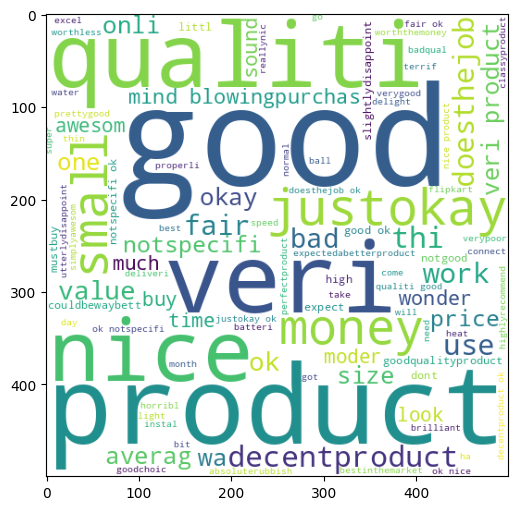

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

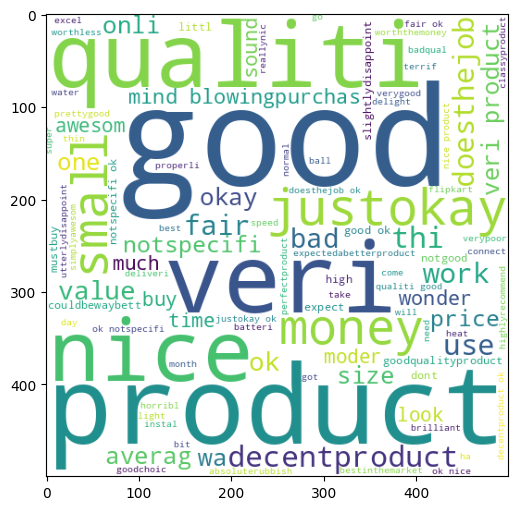

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

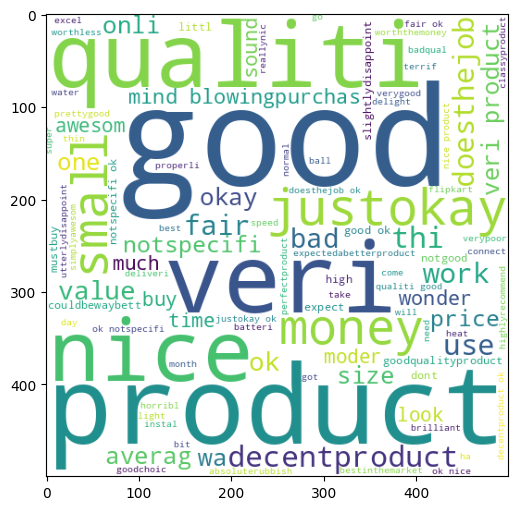

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(neutral_wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(max_features=500,stop_words='english')

In [ ]:
count_vector.fit(flipkart_tags['Tags'])

CountVectorizer(max_features=500, stop_words='english')

In [ ]:
review_matrix = count_vector.transform(flipkart_tags['Tags']).toarray()

In [ ]:
X = review_matrix
Y = flipkart_tags['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
predictions = nb_model.predict(X_test)

<Axes: >

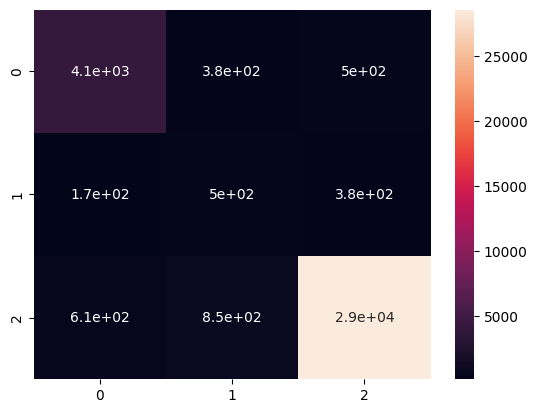

In [ ]:
from sklearn.metrics import  classification_report,confusion_matrix

sns.heatmap(confusion_matrix(predictions,Y_test),annot=True)

In [ ]:
print(confusion_matrix(predictions,Y_test))

[[ 4107   381   503]
 [  173   503   377]
 [  607   847 28578]]


In [ ]:
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

    negative       0.84      0.82      0.83      4991
     neutral       0.29      0.48      0.36      1053
    positive       0.97      0.95      0.96     30032

    accuracy                           0.92     36076
   macro avg       0.70      0.75      0.72     36076
weighted avg       0.93      0.92      0.93     36076



In [ ]:
pickle.dump(nb_model, open('Flipkart_review_model.sav', 'wb'))

In [ ]:
jb.dump(count_vector,'Vector_matrix.joblib')

['Vector_matrix.joblib']